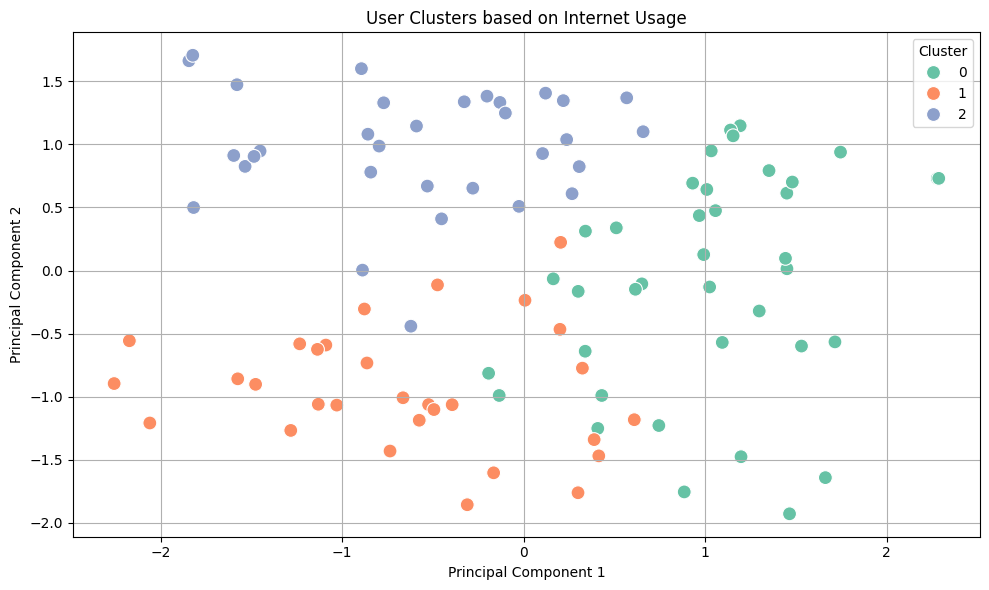

Silhouette Score: 0.270
Davies-Bouldin Index: 1.246


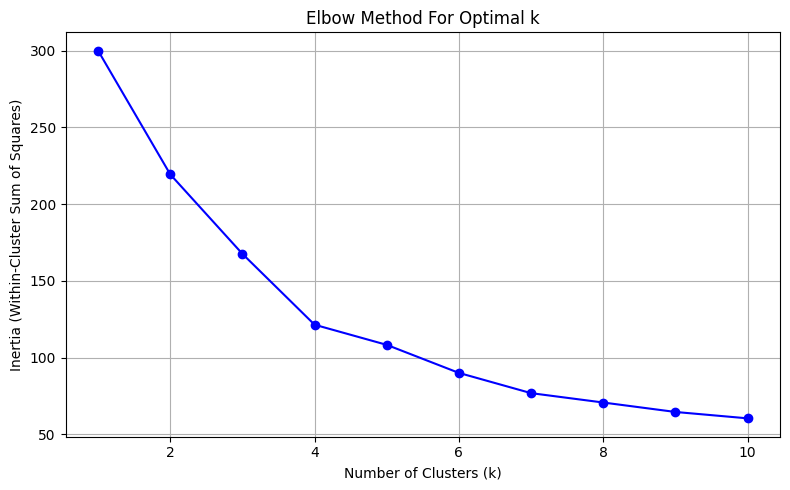

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/internet_usage.csv"
df = pd.read_csv(file_path)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply KMeans clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df['PC1'] = reduced_data[:, 0]
df['PC2'] = reduced_data[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=100)
plt.title("User Clusters based on Internet Usage")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation Metrics
sil_score = silhouette_score(scaled_data, clusters)
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")

# Elbow Method to determine optimal number of clusters
inertia_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

